In [69]:
import pandas as pd
import numpy as np
import re
import math

from urllib.parse import urlparse
from matplotlib import pyplot as plt
import seaborn as sns

from tensorflow.keras import layers
from tensorflow import keras

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, log_loss, mean_squared_error, f1_score

In [70]:
filename = "/Users/julia/Downloads/QRcode12 size 65X65/malicious_phish.csv"

In [71]:
#attribute contains https characters
def httpSecure(url):
    htp = urlparse(url).scheme
    match = str(htp)
    if match=='https':
        return 1
    else:
        return 0

In [72]:
def abnormal_url(url):
    hostname = urlparse(url).hostname
    hostname = str(hostname)
    match = re.search(hostname, url)
    if match:
        return 1
    else:
        return 0

In [73]:
#attribute num_digit numeric
def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits

In [74]:
#attribute num_letter numeric
def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters

In [75]:
df = pd.read_csv(filename)
df.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [76]:
#extract features
df['https']        = df['url'].apply(lambda i: httpSecure(i))
df['abnormal_url'] = df['url'].apply(lambda i: abnormal_url(i))
df['digits']       = df['url'].apply(lambda i: digit_count(i))
df['letters']      = df['url'].apply(lambda i: letter_count(i))

df['url_length']   = [len(x) for x in df.url] #attribute url_length numeric
df['num_tokens']   = [len(re.findall(r'\w+', x)) for x in df.url] #attribute num_tokens numeric
df['label']        = [1 if i == "benign" else 0 for i in df.type] # Converting label to int

#attribute num_symbol numeric
symbol = ['&','/','\\',';','_','@','?','-','=','.','#','%','+','$','!','*',',','//']
for i in symbol:
    name = 'num_of_' + i 
    df[name] = [x.count(i) for x in df.url]
    
df.label.value_counts()

1    428103
0    223088
Name: label, dtype: int64

In [77]:
df.to_csv('URL data 24 features.csv')

In [21]:
X = df.drop(['url','label','type'],axis = 1)
y = df['label']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)
X_train.head()

,https,abnormal_url,digits,letters,url_length,num_tokens,num_of_&,num_of_/,num_of_\,num_of_;,...,num_of_=,num_of_.,num_of_#,num_of_%,num_of_+,num_of_$,num_of_!,num_of_*,"num_of_,",num_of_//
510482,0,0,0,26,31,5,0,3,0,0,...,0,1,0,0,0,0,0,0,0,0
194358,0,1,6,65,86,13,0,6,0,0,...,0,1,0,0,0,0,0,0,0,1
611258,0,0,6,76,94,12,1,3,0,1,...,2,3,0,0,0,0,0,0,0,0
417382,0,0,0,34,39,6,0,4,0,0,...,0,1,0,0,0,0,0,0,0,0
225565,0,0,0,69,80,12,0,2,0,0,...,0,1,0,0,0,0,0,0,0,0


In [23]:
y_train.value_counts()

1    342538
0    178414
Name: label, dtype: int64

In [24]:
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
scl.fit(X_train)
X_train = scl.transform(X_train)
X_test = scl.transform(X_test)
# oversampling
#sm = SMOTE(random_state=2)

colss = X.columns.to_list()
X_train = pd.DataFrame(X_train, columns = colss )
X_test = pd.DataFrame(X_test, columns = colss )

In [25]:
model = keras.Sequential()
model.add(keras.layers.Dense(32, activation = 'relu', input_shape = (24,)))
model.add(keras.layers.Dense(16, activation ='relu'))
model.add(keras.layers.Dense(8, activation ='relu')) 
model.add(keras.layers.Dense(1, activation ='sigmoid')) 

model.compile(optimizer = keras.optimizers.Adam(1e-3) ,loss = 'binary_crossentropy', metrics = ['acc'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 32)                800       
                                                                 
 dense_9 (Dense)             (None, 16)                528       
                                                                 
 dense_10 (Dense)            (None, 8)                 136       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1,473
Trainable params: 1,473
Non-trainable params: 0
_________________________________________________________________


In [26]:
history = model.fit(X_train, y_train, batch_size = 256, epochs = 200, validation_data = (X_test, y_test))

Epoch 1/200
2035/2035 [==============================] - 8s 4ms/step - loss: 0.2178 - acc: 0.9103 - val_loss: 0.1740 - val_acc: 0.9280
Epoch 2/200
2035/2035 [==============================] - 8s 4ms/step - loss: 0.1672 - acc: 0.9331 - val_loss: 0.1612 - val_acc: 0.9373
Epoch 3/200
2035/2035 [==============================] - 8s 4ms/step - loss: 0.1582 - acc: 0.9379 - val_loss: 0.1562 - val_acc: 0.9394
Epoch 4/200
2035/2035 [==============================] - 7s 3ms/step - loss: 0.1527 - acc: 0.9400 - val_loss: 0.1508 - val_acc: 0.9400
Epoch 5/200
2035/2035 [==============================] - 7s 3ms/step - loss: 0.1493 - acc: 0.9409 - val_loss: 0.1486 - val_acc: 0.9406
Epoch 6/200
2035/2035 [==============================] - 9s 4ms/step - loss: 0.1470 - acc: 0.9413 - val_loss: 0.1468 - val_acc: 0.9427
Epoch 7/200
2035/2035 [==============================] - 7s 4ms/step - loss: 0.1455 - acc: 0.9418 - val_loss: 0.1444 - val_acc: 0.9420
Epoch 8/200
2035/2035 [==============================] 

2035/2035 [==============================] - 6s 3ms/step - loss: 0.1277 - acc: 0.9479 - val_loss: 0.1303 - val_acc: 0.9479
Epoch 122/200
2035/2035 [==============================] - 6s 3ms/step - loss: 0.1276 - acc: 0.9479 - val_loss: 0.1331 - val_acc: 0.9468
Epoch 123/200
2035/2035 [==============================] - 4s 2ms/step - loss: 0.1275 - acc: 0.9481 - val_loss: 0.1314 - val_acc: 0.9475
Epoch 124/200
2035/2035 [==============================] - 5s 2ms/step - loss: 0.1275 - acc: 0.9481 - val_loss: 0.1299 - val_acc: 0.9475
Epoch 125/200
2035/2035 [==============================] - 4s 2ms/step - loss: 0.1274 - acc: 0.9480 - val_loss: 0.1309 - val_acc: 0.9467
Epoch 126/200
2035/2035 [==============================] - 4s 2ms/step - loss: 0.1275 - acc: 0.9479 - val_loss: 0.1311 - val_acc: 0.9475
Epoch 127/200
2035/2035 [==============================] - 4s 2ms/step - loss: 0.1276 - acc: 0.9480 - val_loss: 0.1301 - val_acc: 0.9479
Epoch 128/200
2035/2035 [==============================

Epoch 181/200
2035/2035 [==============================] - 6s 3ms/step - loss: 0.1262 - acc: 0.9484 - val_loss: 0.1313 - val_acc: 0.9471
Epoch 182/200
2035/2035 [==============================] - 11s 5ms/step - loss: 0.1265 - acc: 0.9484 - val_loss: 0.1305 - val_acc: 0.9472
Epoch 183/200
2035/2035 [==============================] - 8s 4ms/step - loss: 0.1263 - acc: 0.9485 - val_loss: 0.1299 - val_acc: 0.9479
Epoch 184/200
2035/2035 [==============================] - 7s 3ms/step - loss: 0.1263 - acc: 0.9485 - val_loss: 0.1297 - val_acc: 0.9478
Epoch 185/200
2035/2035 [==============================] - 7s 3ms/step - loss: 0.1264 - acc: 0.9485 - val_loss: 0.1296 - val_acc: 0.9477
Epoch 186/200
2035/2035 [==============================] - 7s 3ms/step - loss: 0.1263 - acc: 0.9486 - val_loss: 0.1304 - val_acc: 0.9471
Epoch 187/200
2035/2035 [==============================] - 6s 3ms/step - loss: 0.1263 - acc: 0.9487 - val_loss: 0.1289 - val_acc: 0.9481
Epoch 188/200
2035/2035 [===============

In [27]:
model.save("url-nn")

INFO:tensorflow:Assets written to: url-nn/assets


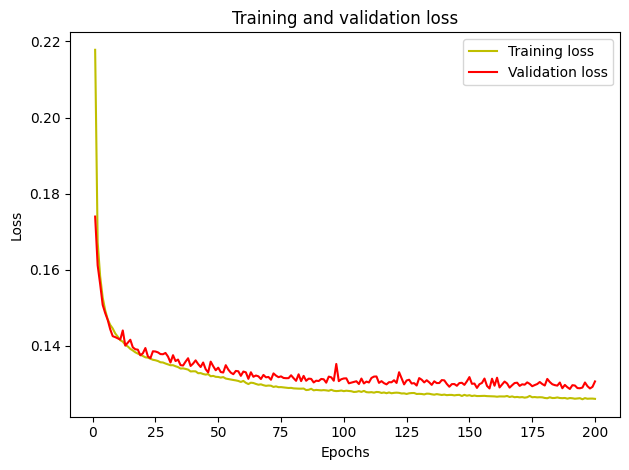

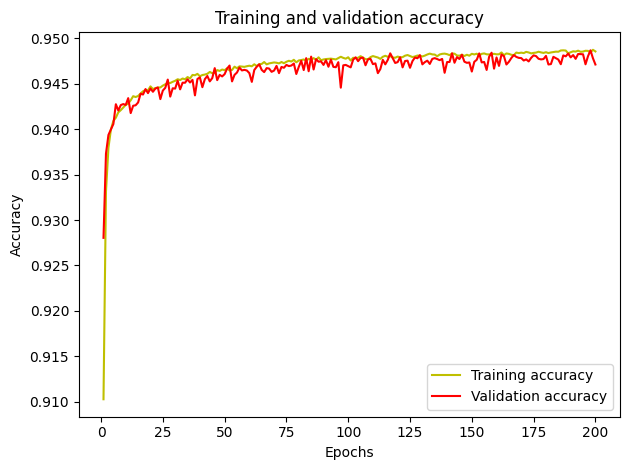

In [28]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epoch = range(1, len(loss) + 1)
plt.plot(epoch, loss, 'y', label = 'Training loss')
plt.plot(epoch, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.savefig("scaled nn los.png")
plt.show()


acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epoch, acc, 'y', label = 'Training accuracy')
plt.plot(epoch, val_acc, 'r', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.savefig("scaled nn acc.png")
plt.show()




In [29]:
#get actual metrics of train data
score_train = model.evaluate(X_train, y_train)

#get actual metrics of test data
score_test = model.evaluate(X_test, y_test)

print('train score',score_train )
print('test score',score_test )

4070/4070 [==============================] - 7s 2ms/step - loss: 0.1307 - acc: 0.9471
train score [0.1264173537492752, 0.9480950236320496]
test score [0.1306522935628891, 0.9471049308776855]


In [30]:
scores = [score_train[1],score_test[1]]
output = pd.DataFrame({"Model":['Train','Test'], "Score":scores})

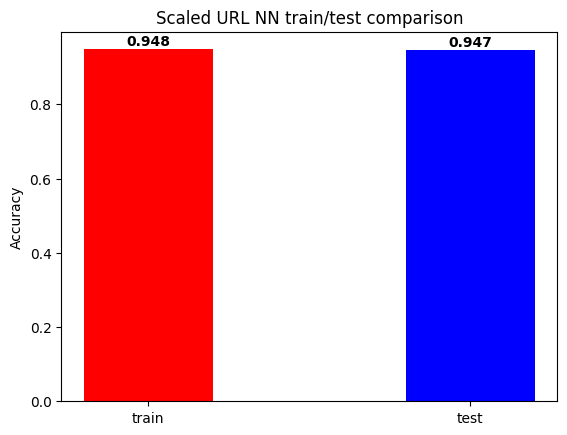

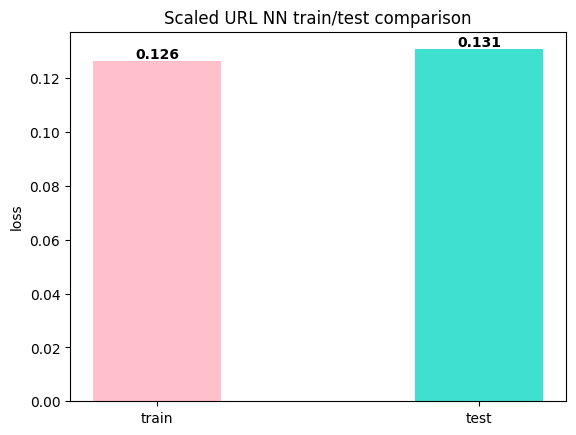

In [68]:

plt.bar(["train", "test"],
        [score_train[1], score_test[1]],
        color=['red', 'blue'], width=0.4)

a =  [score_train[1], score_test[1]]
for i in range(len(a)):
    plt.text(i, a[i]+0.01,format( a[i],'.3f'), ha = 'center', color='black', fontweight='bold', size = 10)

plt.ylabel("Accuracy")
plt.title("Scaled URL NN train/test comparison")
plt.savefig("scaled nn rl-train-test-accuracy.png")
plt.show()


plt.bar(["train", "test"],
        [score_train[0], score_test[0]],
        color=['pink', 'turquoise'], width=0.4)
b =  [score_train[0], score_test[0]]
for i in range(len(b)):
    plt.text(i, b[i]+0.001, format( b[i], '.3f'), ha = 'center', color='black', fontweight='bold', size = 10)


plt.ylabel("loss")
plt.title("Scaled URL NN train/test comparison")
plt.savefig( "scaled nn rl-train-test-loss.png")
plt.show()

In [ ]:
plt.figure(figsize=(10, 7))
plots = sns.barplot(x = 'Model', y = 'Score', data = output)
for bar in plots.patches:
    plots.annotate(format(bar.get_height() * 100, '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha = 'center', va = 'center',
                   size = 15, xytext = (0, 8),
                   textcoords='offset points')

plt.ylabel("Score", size = 14)
plt.tight_layout()
plt.savefig("scaled scores nn.png")
plt.show()

In [ ]:
#Plot NN model together with all classical models
save_path = "/Users/julia/Downloads/QRcode12 size 65X65/"

DTacc = [0.967, 0.947]
FRacc = [0.94, 0.938]
Adaacc = [0.9122, 0.9123]
Extacc = [0.9675, 0.952]
XGBacc = [0.95, 0.949]
NNbinary =[0.948, 0.947]
plt.figure(figsize = (10,6))
plt.bar(["DT train", "DT test","FR train", "FR test","Ada train", "Ada test", "Ext train", "Ext test", "XGB train", "XGB test", "NN train", "NN test"],
        [DTacc[0], DTacc[1], FRacc[0],FRacc[1],Adaacc[0],Adaacc[1], Extacc[0],Extacc[1],  XGBacc[0],XGBacc[1] ,  NNbinary[0],NNbinary[1]],
        color=['red', 'blue','red', 'blue','red', 'blue','red', 'blue','red', 'blue','red', 'blue'], width=0.4)

plt.ylabel("Accuracy")
plt.title(" accuracy train/test comparison")
plt.savefig(save_path +  " scaled url all-best-train-test-accuracy with nn.png")
plt.show()

#plot log loss

DTlog = [1.2, 1.82]
FRlog = [2.066, 2.132]
Adalog = [3.03, 3.028]
Extlog = [1.12, 1.65]
XGBlog = [1.709, 1.74]
NNbinarylog =[0.126, 0.131]
plt.figure(figsize = (10,6))
plt.bar(["DT train", "DT test","FR train", "FR test","Ada train", "Ada test", "Ext train", "Ext test", "XGB train", "XGB test", "NN train", "NN test"],
        [DTlog[0], DTlog[1], FRlog[0],FRlog[1],Adalog[0],Adalog[1], Extlog[0],Extlog[1], XGBlog[0],XGBlog[1], NNbinarylog[0],NNbinarylog[1]],
        color=['pink', 'turquoise','pink', 'turquoise','pink', 'turquoise', 'pink', 'turquoise'], width=0.4)

plt.ylabel("log loss")
plt.title("loss train/test comparison")
plt.savefig(save_path + "scaled url all-best-train-test-loss with nn.png")
plt.show()